# Study of promising areas of computer science based on data on Turing Prize winners
### This demonstrative mini-project consists of scraping the official site of the Turing Award, converting data to csv format, visualizing and analyzing the received data.



First, we import the necessary libraries:

In [1]:
from bs4 import BeautifulSoup as bs
import cloudscraper
import re
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

DEPRECATION: The OpenSSL being used by this python install (OpenSSL 1.1.0j  20 Nov 2018) does not meet the minimum supported version (>= OpenSSL 1.1.1) in order to support TLS 1.3 required by Cloudflare, You may encounter an unexpected Captcha or cloudflare 1020 blocks.


The web page that we open is at the following URL:

In [2]:
URL = 'https://amturing.acm.org/bysubject.cfm'

The following expression returns a CloudScraper instance:

In [3]:
scrapper = cloudscraper.create_scraper()

Parse HTML code with lxml parser using BeautifulSoup library and select a piece of code with the necessary information:

In [4]:
html = scrapper.get(URL)
soup_1 = bs(html.text, 'lxml')   # parsing HTML code with lxml parser
subjects = soup_1.find('div', class_='col col2B')

In the code of the original web page I highlight the name of the research subject and the number of winners for each research subject. 
Then I make a transition to another web page containing a list of winners in each specific area. From the page code of each winner individually, I extract information about his full name, country of residence and year of receipt of the award.

In [5]:
all_winners = [] 

for a in subjects.find_all('a'):
    subject = a.get('title')
    winners_number = re.findall(r'\d+', subject)
    winners_url = 'https://amturing.acm.org' + a.get('href')
    html = scrapper.get(winners_url)
    soup_2 = bs(html.text, 'lxml')
    winners = soup_2.find('ul', class_='award-winners-list')
    for b in winners.find_all('a'):
        winner_url = 'https://amturing.acm.org' + b.get('href')
        html = scrapper.get(winner_url)
        soup_3 = bs(html.text, 'lxml')
        info = soup_3.find('div', class_='description').span.text
        country = info.split(' – ')[0]
        year = info.split(' – ')[1]
        name = soup_3.find('h1', class_='country')
        name = name.get_text().strip("\n")
        all_winners.append({
            "Research subject": subject.split(" (")[0],
            "Number of winners": winners_number[0],
            "Winners": name,
            "Country": country,
            "Year": year
    })  
    

And finally I write the data to the csv file:

In [6]:
with open('all_winners.csv', 'w') as output_file:
    w = csv.DictWriter(output_file, ['Research subject', 'Number of winners', 'Winners', 'Country', 'Year'])
    w.writeheader()
    for winner in all_winners:
        w.writerow(winner)

For clarity, I will display the resulting file:

In [7]:
df = pd.read_csv('all_winners.csv')

In [8]:
df

,Research subject,Number of winners,Winners,Country,Year
0,Analysis of Algorithms,5,John E Hopcroft,United States,1986
1,Analysis of Algorithms,5,"Donald (""Don"") Ervin Knuth",United States,1974
2,Analysis of Algorithms,5,Leslie Lamport,United States,2013
3,Analysis of Algorithms,5,Judea Pearl,United States,2011
4,Analysis of Algorithms,5,Robert (Bob) Endre Tarjan,United States,1986
...,...,...,...,...,...
93,Verification of Hardware and Software Models,3,E. Allen Emerson,United States,2007
94,Verification of Hardware and Software Models,3,Joseph Sifakis,France,2007
95,Computer Systems,1,"Fernando J (""Corby"") Corbato",United States,1990
96,Machine Learning,1,Leslie Gabriel Valiant,United States,2010


## Visualization

1. Countries of location of winners:

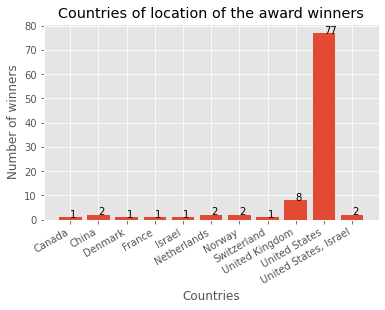

In [9]:
df = pd.read_csv('all_winners.csv')
df = df.groupby(['Country']).size().reset_index(name='Number')
x = df['Country']
y = df['Number']

plt.style.use('ggplot')
plt.bar(x, y, width=0.8)
plt.xlabel('Countries')
plt.ylabel('Number of winners')
plt.gcf().autofmt_xdate()
plt.title('Countries of location of the award winners')
for x, y, y in zip(x, y, y):
   plt.text(x, y, y)

plt.show()

As can be seen from the graph, the largest number of awardees is from the United States.

2. Distribution of awards by research subjects:

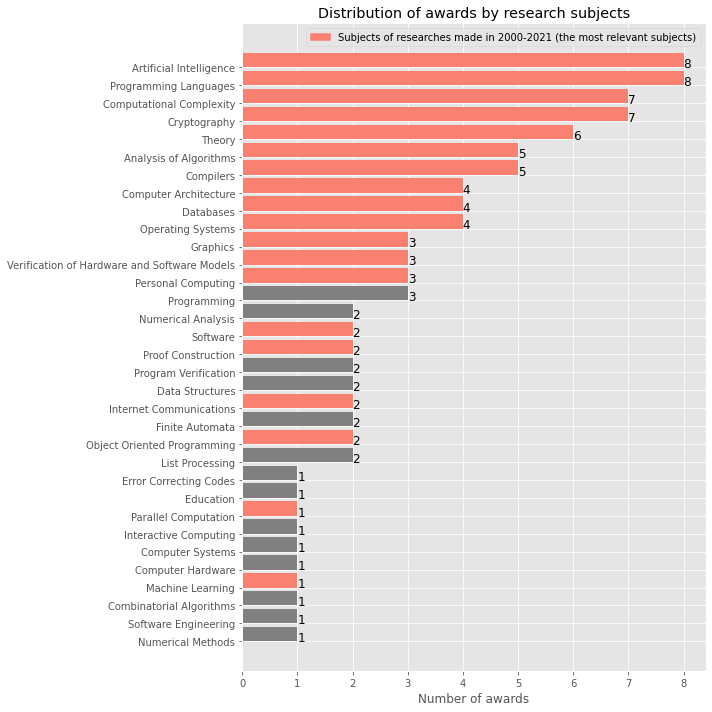

In [10]:
df = pd.read_csv('all_winners.csv')

create2 = df.loc[(df['Year']) > 2000]
create2 = create2.groupby(['Research subject']).size().reset_index(name='Number')

create1 = df.groupby(['Research subject']).size().reset_index(name='Number')
create1 = create1.sort_values(by='Number', ascending=True)

x = np.array(create1['Research subject'].values)
y = np.array(create1['Number'].values)
x1 = np.array(create2['Research subject'].values)
y1 = np.array(create2['Number'].values)

plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

colors = [
   'salmon' if x[i] in x1 else 'grey' for i in range(0, len(x))
    ]
plt.barh(x, y, align='edge', color=colors)
patch = mpatches.Patch(
    color='salmon',
    label='Subjects of researches made in 2000-2021 (the most relevant subjects)'
                       )
plt.legend(handles=[patch])
plt.xlabel('Number of awards')
plt.title('Distribution of awards by research subjects')
plt.tight_layout()
for y, x, y1 in zip(y, x, y):
   plt.text(y, x, y, fontsize=12)

plt.show()

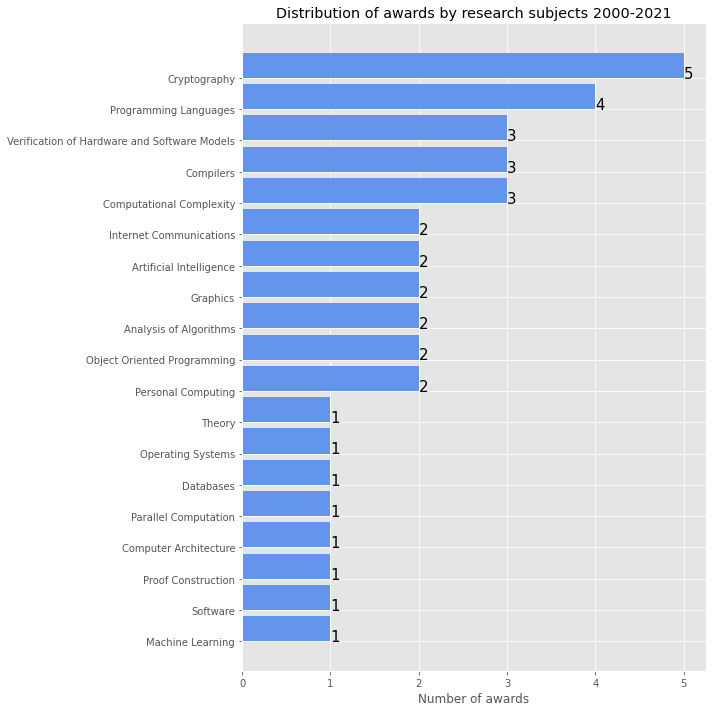

In [11]:
df = pd.read_csv('all_winners.csv')

df = df.loc[(df['Year']) > 2000]
df = df.groupby(['Research subject']).size().reset_index(name='Number')
df = df.sort_values(by='Number', ascending=True)

x = df['Research subject']
y = df['Number']

plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

plt.barh(x, y, align='edge', color='cornflowerblue')
plt.xlabel('Number of awards')
plt.title('Distribution of awards by research subjects 2000-2021')
plt.tight_layout()
for y, x, y1 in zip(y, x, y):
   plt.text(y, x, y, fontsize=15)

plt.show()

In this work, I mean that the development in a particular field of computer science is directly related to the number of widely presented and awarded works.

From the last two graphs, it can be seen that 
<div class="alert-info">
1. In the last approximately 20 years, the field of cryptography has been actively developing. 
<div>
<div class="alert-info">
2. Programming languages is still quite a promising area of computer science. 
<div>
<div class="alert-info">
3. All three works in the field of Verification of Hardware and Software Models were performed in the last 20 years, which indicates that this area of research is quite new, and therefore promising for further development. 
</div>
<div class="alert-info">
4. The same can be said about Internet Communications and Object Oriented Programming.
</div>
<div class="alert-info">
5. We can assume the same for research in the field of Machine Learning, but there is not enough data for such a statement.
    </div>
